In [226]:
import pandas as pd 

df = pd.read_csv('/Users/rohith/Documents/Datasets/Iris_dataset/iris.csv')

In [227]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

In [228]:
classes = df['Species']
df = df.drop(['Id','Species'],axis=1)

In [229]:
data = df.values.tolist()

In [230]:
import numpy as np

data = np.array(data)
print(data.shape)

(150, 4)


In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
trans_data = pca.fit_transform(data)

In [232]:
print(trans_data.shape)

(150, 3)


In [233]:
a = trans_data[:,0]
b = trans_data[:,1]
c = trans_data[:,2]

a = a.reshape(150,1)
b = b.reshape(150,1)
c = c.reshape(150,1)

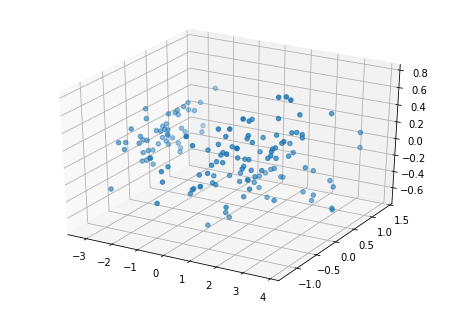

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.gcf())
ax.scatter(a,b,c)


#plt.scatter(a,b)

In [235]:
from sklearn.utils import shuffle

data,classes = shuffle(data,classes)
train_data = data[:135]
test_data = data[135:]

In [236]:
from sklearn.cluster import KMeans 

clf = KMeans(n_clusters = 3)
clf.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [237]:
print(clf.predict(test_data))
pred = clf.predict(test_data)

[0 1 0 0 2 0 2 1 2 0 1 2 0 0 0]


In [239]:
test_classes = []
for val in classes[135:]:
    if(val == 'Iris-versicolor'):
        test_classes.append(2)
    elif(val == 'Iris-virginica'):
        test_classes.append(0)
    else:
        test_classes.append(1)

In [240]:
for i in range(len(pred)):
    print('pred:',pred[i],'GT:',test_classes[i])

('pred:', 0, 'GT:', 2)
('pred:', 1, 'GT:', 1)
('pred:', 0, 'GT:', 2)
('pred:', 0, 'GT:', 2)
('pred:', 2, 'GT:', 0)
('pred:', 0, 'GT:', 2)
('pred:', 2, 'GT:', 0)
('pred:', 1, 'GT:', 1)
('pred:', 2, 'GT:', 0)
('pred:', 0, 'GT:', 0)
('pred:', 1, 'GT:', 1)
('pred:', 2, 'GT:', 2)
('pred:', 0, 'GT:', 2)
('pred:', 0, 'GT:', 0)
('pred:', 0, 'GT:', 0)


In [253]:
new_pred = []
for i in range(len(pred)):
    if(pred[i] == 0):
        new_pred.append(2)
    elif(pred[i] == 1):
        new_pred.append(1)
    else:
        new_pred.append(0)

In [254]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_classes,new_pred))

0.733333333333


In [241]:
## K-Means Algorithm
import random
import numpy as np

c1 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),float(np.random.randint(1,7)),float(np.random.randint(0,3))]
c2 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),float(np.random.randint(1,7)),float(np.random.randint(0,3))]
c3 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),float(np.random.randint(1,7)),float(np.random.randint(0,3))]
#print(c1,c2,c3)
epochs = 1
while(epochs <= 100):
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    for point in train_data:
        dis_point_c1 = ((c1[0]-point[0])**2 + (c1[1]-point[1])**2 + (c1[2]-point[2])**2 + (c1[3]-point[3])**2)**0.5
        dis_point_c2 = ((c2[0]-point[0])**2 + (c2[1]-point[1])**2 + (c2[2]-point[2])**2 + (c2[3]-point[3])**2)**0.5
        dis_point_c3 = ((c3[0]-point[0])**2 + (c3[1]-point[1])**2 + (c3[2]-point[2])**2 + (c3[3]-point[3])**2)**0.5
        distances = [dis_point_c1,dis_point_c2,dis_point_c3]
        pos = distances.index(min(distances))
        if(pos == 0):
            cluster_1.append(point)
        elif(pos == 1):
            cluster_2.append(point)
        else:
            cluster_3.append(point)
    prev_c1 = c1
    prev_c2 = c2
    prev_c3 = c3
    cluster_1 = np.array(cluster_1)
    cluster_2 = np.array(cluster_2)
    cluster_3 = np.array(cluster_3)
#     print(cluster_1.shape)
#     print(cluster_2.shape)
#     print(cluster_3.shape)
    if(len(cluster_1) != 0):
        c1 = [sum(cluster_1[:,0])/float(len(cluster_1)),sum(cluster_1[:,1])/float(len(cluster_1)),
             sum(cluster_1[:,2])/float(len(cluster_1)),sum(cluster_1[:,3])/float(len(cluster_1))]
    if(len(cluster_2) != 0):
        c2 = [sum(cluster_2[:,0])/float(len(cluster_2)),sum(cluster_2[:,1])/float(len(cluster_2)),
             sum(cluster_2[:,2])/float(len(cluster_2)),sum(cluster_2[:,3])/float(len(cluster_2))]
    if(len(cluster_3) != 0):
        c3 = [sum(cluster_3[:,0])/float(len(cluster_3)),sum(cluster_3[:,1])/float(len(cluster_3)),
             sum(cluster_3[:,2])/float(len(cluster_3)),sum(cluster_3[:,3])/float(len(cluster_3))]
    if(prev_c1 == c1 and prev_c2 == c2 and prev_c3 == c3):
        print("Converged")
        break
    print(epochs)
    epochs += 1
    

1
2
3
4
5
6
Converged


In [242]:
print(c1)

[6.8799999999999999, 3.0628571428571427, 5.7628571428571416, 2.0714285714285712]


In [243]:
print(c2)

[5.8660377358490559, 2.7283018867924516, 4.3471698113207546, 1.4150943396226412]


In [244]:
print(c3)

[5.0148936170212766, 3.4425531914893619, 1.4659574468085104, 0.25106382978723396]


In [245]:
test_cl = []
for point in test_data:
    dis_point_c1 = ((c1[0]-point[0])**2 + (c1[1]-point[1])**2 + (c1[2]-point[2])**2 + (c1[3]-point[3])**2)**0.5
    dis_point_c2 = ((c2[0]-point[0])**2 + (c2[1]-point[1])**2 + (c2[2]-point[2])**2 + (c2[3]-point[3])**2)**0.5
    dis_point_c3 = ((c3[0]-point[0])**2 + (c3[1]-point[1])**2 + (c3[2]-point[2])**2 + (c3[3]-point[3])**2)**0.5
    distances = [dis_point_c1,dis_point_c2,dis_point_c3]
    pos = distances.index(min(distances))
    test_cl.append(pos)

In [248]:
for i in range(len(test_classes)):
    print('pred:',test_cl[i],'GT:',test_classes[i])

('pred:', 1, 'GT:', 2)
('pred:', 2, 'GT:', 1)
('pred:', 1, 'GT:', 2)
('pred:', 1, 'GT:', 2)
('pred:', 0, 'GT:', 0)
('pred:', 1, 'GT:', 2)
('pred:', 0, 'GT:', 0)
('pred:', 2, 'GT:', 1)
('pred:', 0, 'GT:', 0)
('pred:', 1, 'GT:', 0)
('pred:', 2, 'GT:', 1)
('pred:', 0, 'GT:', 2)
('pred:', 1, 'GT:', 2)
('pred:', 1, 'GT:', 0)
('pred:', 1, 'GT:', 0)


In [251]:
new_test_cl = []
for i in range(len(test_cl)):
    if(test_cl[i] == 1):
        new_test_cl.append(2)
    elif(test_cl[i] == 2):
        new_test_cl.append(1)
    else:
        new_test_cl.append(0)

In [252]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_classes,new_test_cl))

0.733333333333
